In [2]:
#Importing the necessary packages:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv("https://github.com/Explore-AI/Public-Data/blob/master/exports%20ZAR-USD-data.csv?raw=true", index_col = 0)

In [5]:
df

,ZAR/USD,Value of Exports (ZAR)
2008M01,7.01,39356.82
2008M02,7.66,46946.33
2008M03,7.97,51150.89
2008M04,7.79,56174.34
2008M05,7.62,56240.45
...,...,...
2017M08,13.23,103199.17
2017M09,13.16,102150.48
2017M10,13.71,104205.42
2017M11,14.06,116185.99


In [10]:
#Renaming the columns to 'Y' and 'X' for easier mathematical manipulation:
df.columns = ['Y', 'X']
df[['Y','X']]

,Y,X
2008M01,7.01,39356.82
2008M02,7.66,46946.33
2008M03,7.97,51150.89
2008M04,7.79,56174.34
2008M05,7.62,56240.45
...,...,...
2017M08,13.23,103199.17
2017M09,13.16,102150.48
2017M10,13.71,104205.42
2017M11,14.06,116185.99


In [11]:
#Converting the number of months per year into a Numpy array for easier manipulation:
months = np.arange(len(df.Y))
months

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119])

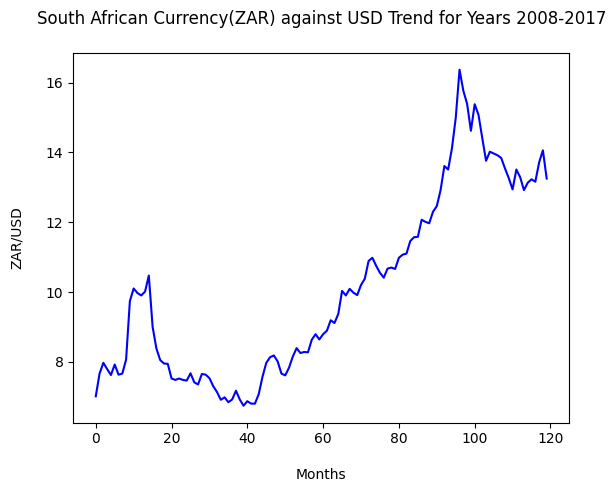

In [17]:
#Generating a line graph to showcase the Monthly Trend of South African Currency value(ZAR/USD) for years 2008 - 2017
plt.plot(months, df.Y, color = 'blue')
plt.title("South African Currency(ZAR) against USD Trend for Years 2008-2017\n")
plt.xlabel("\nMonths")
plt.ylabel("ZAR/USD\n")
plt.show()

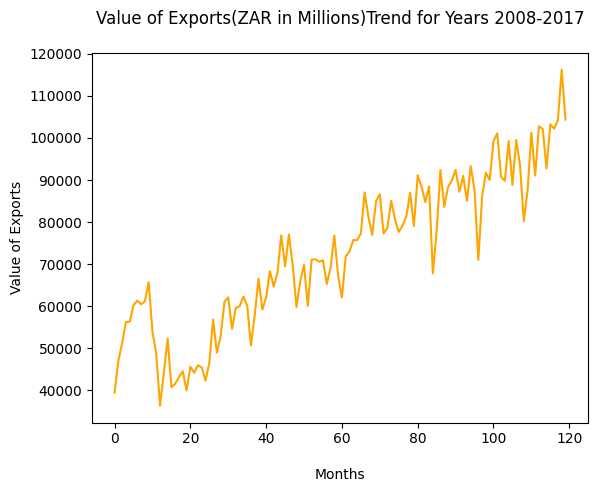

In [24]:
#Generating a line plot representing Monthly Trend of the Value of Exports(ZAR in Millions) for Years 2008-2017
plt.plot(months, df.X, color = 'orange')
plt.title("Value of Exports(ZAR in Millions)Trend for Years 2008-2017\n")
plt.xlabel("\nMonths")
plt.ylabel("Value of Exports")
plt.show()

Comparing both Trend movements on the same graph:

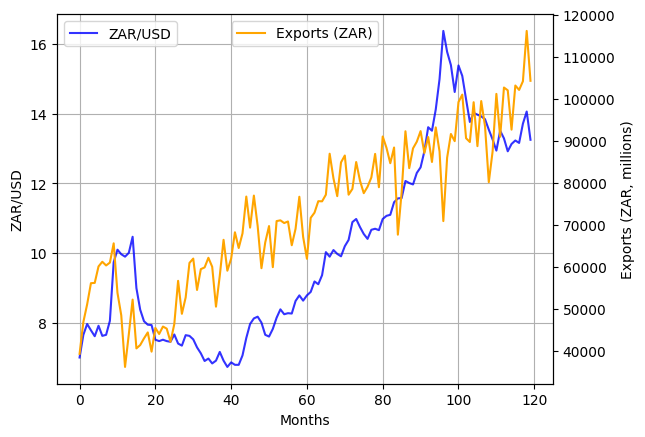

In [26]:

fig = plt.figure() 

ax = fig.add_subplot(111) 

# Plotting the ZAR/USD exchange rate data on the primary y-axis:
ax.plot(np.arange(len(df.Y)), df.Y, '-', label = 'ZAR/USD', color='blue', alpha = 0.8) 

# Creating a second y-axis (twin of the first) to accommodate another data set on the same x-axis
ax2 = ax.twinx() 

# Plotting the Value of Exports data on the secondary y-axis
ax2.plot(np.arange(len(df.X)), df.X, '-', label = 'Exports (ZAR)', color = 'orange')

# Adding legends to distinguish the two lines:
ax.legend(loc=2) 
ax2.legend(loc=9)  

ax.grid() 

# Setting the labels for the x-axis and both y-axes to indicate the data being plotted
ax.set_xlabel("Months")
ax.set_ylabel("ZAR/USD")
ax2.set_ylabel("Exports (ZAR, millions)")

plt.show() 

So the plots above – although they are easy to interpret – show too many variables.

Let's then try to model ZAR/USD Currency Value as a function of Exports (ZAR in Millions)

 We are going to use exports as a predictor for currency value.
 
We will choose the Rand:Dollar exchange rate as our dependent variable and the monthly value of exports (in Rands) as our independent variable.

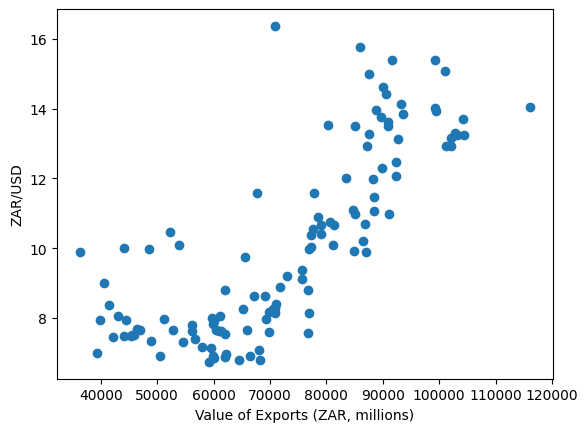

In [27]:
plt.scatter(df['X'], df['Y'])
plt.ylabel("ZAR/USD")
plt.xlabel("Value of Exports (ZAR, millions)")
plt.show()

From the plot above, we can see that there possibly exists a linear relationship between the two variables: __Value of Exports__ and __ZAR/USD__, due to the linear trend of the data.

We can therefore be able to predict future values of ZAR/USD Based on the Historical Trend Data observed above.

__PREDICTING FUTURE VALUES OF ZAR/USD BASED ON OBSERVED VALUE OF EXPORTS__

In [52]:
from sklearn.linear_model import LinearRegression
lm =LinearRegression()

In [53]:
#Value of Exports changed to 2D Numpy Array:
X = df.X.values.reshape(-1,1)
X

array([[ 39356.82],
       [ 46946.33],
       [ 51150.89],
       [ 56174.34],
       [ 56240.45],
       [ 60159.93],
       [ 61268.16],
       [ 60390.94],
       [ 61067.34],
       [ 65652.57],
       [ 53877.9 ],
       [ 48541.09],
       [ 36251.75],
       [ 44061.75],
       [ 52267.6 ],
       [ 40656.33],
       [ 41456.8 ],
       [ 43039.15],
       [ 44461.89],
       [ 39880.63],
       [ 45535.41],
       [ 44088.89],
       [ 45855.86],
       [ 45361.67],
       [ 42222.67],
       [ 46452.33],
       [ 56732.74],
       [ 48881.26],
       [ 52782.61],
       [ 60991.85],
       [ 62026.96],
       [ 54561.33],
       [ 59514.74],
       [ 59924.36],
       [ 62214.34],
       [ 60077.57],
       [ 50589.55],
       [ 57934.09],
       [ 66490.02],
       [ 59138.45],
       [ 62005.07],
       [ 68288.05],
       [ 64545.09],
       [ 68025.51],
       [ 76780.08],
       [ 69388.71],
       [ 77011.38],
       [ 69775.24],
       [ 59738.68],
       [ 65881.18],


In [54]:
#ZAR/USD CURRENCY VALUE:
df.Y

2008M01     7.01
2008M02     7.66
2008M03     7.97
2008M04     7.79
2008M05     7.62
           ...  
2017M08    13.23
2017M09    13.16
2017M10    13.71
2017M11    14.06
2017M12    13.25
Name: Y, Length: 120, dtype: float64

In [56]:
#Fitting the Linear Regression Model(y = mx +c) to the data:
lm.fit(X, df.Y)

LinearRegression()

In [58]:
m = lm.coef_[0]
c = lm.intercept_

print("The slope of the Linear Regression Model is:", m)
print("The intercept of the Linear Regression Model is:", c)

The slope of the Linear Regression Model is: 0.00011350725765884299
The intercept of the Linear Regression Model is: 1.844811467042648


In [61]:
print("\n\n")

Fitting a __Line Of Best Fit__ to the original scatter plot:

In [64]:
# Use the fitted model to generate Y values from the X values
gen_y = lm.predict(X)   

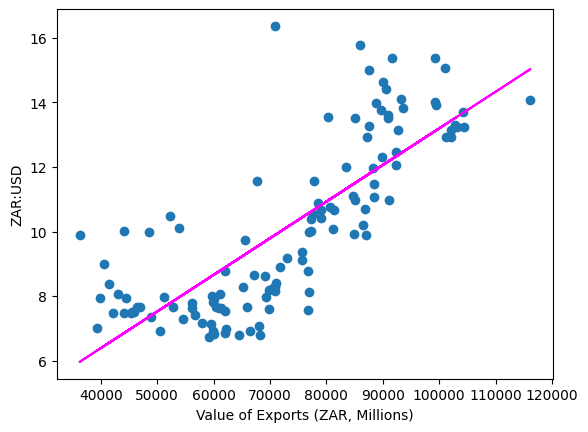

In [65]:
plt.scatter( X, df.Y) #Plot the original observed data
plt.plot( X, gen_y, color ='magenta')   #Plot the line of best fit

#Label the axes:
plt.ylabel("ZAR:USD")
plt.xlabel("Value of Exports (ZAR, Millions)")
plt.show()

# Assessing the model accuracy

We use the __Mean Sqaured Error__(MSE) to quantify the variance between the predicted values of ZAR/USD produced by the model and the actual observed values of ZAR/USD.

In [67]:
from sklearn import metrics

In [70]:
MSE = metrics.mean_squared_error(df.Y, gen_y)
print("The Mean Squared Error is:", round(MSE, 2))

The Mean Squared Error is: 2.68


This value is low indicating that the predictive model is off from the original data outcomes by 2.68 units. 
Hence, this indicates that the Line of Best Fit model is __accurate__

In [71]:
print("\n\n")

We also use the __R Squared Value__ to assess the strength of the relationship between the predicted values and actual observed data:

In [72]:
r2_value = metrics.r2_score(df.Y, gen_y)
print("The R Squared Value is:", round(r2_value, 2))

The R Squared Value is: 0.62


This value of __0.62__ is __relatively close to 1__ indicating a __relatively strong relationship__ between the Line of Best Fit predictive model and the actual observed trend of data.

Therefore, The Model is asserted that it is __accurate__

# CONCLUSION

From the Analysis Above, the insights extracted are:

-  In South Africa, There exists a linear relationship between the Value of Exports and the value of Currency Exchange Rate - an increase in value of exports
  increases the value of the Rand against the Dollar